<a href="https://colab.research.google.com/github/suzysuyeonhur/IOD_lab_work/blob/main/Regularisation_Lab_4_4_030623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.4: Regularisation

# What is Lasso and what is Ridge
* Lasso and Ridge regression are techniques used in linear regression
* They handle cases with many features or variables differently
* Lasso regression performs feature selection by shrinking less important features to zero
* Ridge regression reduces the coefficients of less important features towards zero without eliminating them completely
* **Lasso picks and chooses the most important features, while Ridge keeps all features but reduces their impact**

# How to know which one to use
## Lasso Regression:
* When you have a dataset with a large number of features, but you suspect that only a few of them are truly important in predicting the outcome
* When you want a sparse model that selects the most relevant features and automatically performs feature selection
* For example, in a study to predict housing prices, Lasso regression could be used to identify the most influential factors such as location, square footage, and number of bedrooms, while disregarding less important features like wall color or floor type

## Ridge Regression:
* When you have a dataset with many correlated features, and you believe that most of them contribute to the outcome to some extent
* When you want to reduce the impact of multicollinearity (high correlation) among the features
* For example, in a study to predict student performance, Ridge regression could be used to consider multiple factors like study hours, attendance, and extracurricular activities, even if they are moderately correlated, to avoid overemphasizing a single factor

# History of Ridge and Lasso
* Ridge and Lasso methods were first discovered in the field of statistics in the late 20th century
* Robert Tibshirani, a statistician, was one of the pioneers who developed Lasso regression
* The founding teams consisted of smart mathematicians and statisticians who wanted to improve predictions in various fields
* They were trying to prove that by reducing the impact of less important features, predictions could become more accurate
* Ridge and Lasso were able to solve problems where there were too many features and some features had more impact on predictions than others
* They were like detective tools that helped identify the most important clues and remove the distractions, leading to better predictions in areas like economics, medicine, and even sports analysis

In [ ]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

### 1. Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

#### 1.1 Load Diabetics Data Using datasets of sklearn

Hint: Check Lab 4.3

In [ ]:
## Load the Diabetes dataset

# Load the diabetes dataset from sklearn

diabetes = datasets.load_diabetes()

In [ ]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [ ]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
# Target
y = diabetes.target

#### 1.2 Create a Base Model Using Linear Regression

In [ ]:
# Create Model
model = LinearRegression()

In [ ]:
# Fit
model.fit(X,y)

LinearRegression()

In [ ]:
# Score
model.score(X,y)

0.5177484222203499

In [ ]:
# Check Coeffiricent
model.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [ ]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

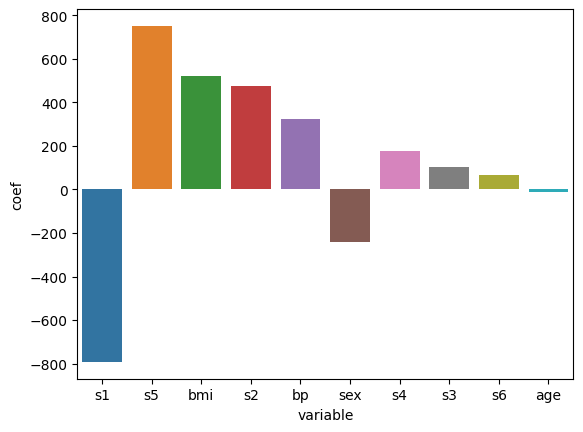

In [ ]:
# Plot Coefficients
view_coeff(X, model)

#### 1.3 Ridge

##### 1.3.1 Calculate Ridge Regression model

In [ ]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
ridgemodel = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridgemodel.set_params(alpha = a)
    ridgemodel.fit(X, y)
    coefs.append(ridgemodel.coef_)
    errors.append(mean_squared_error(ridgemodel.coef_, model.coef_))

In [ ]:
len(coefs)

200

##### 1.3.2 Visual Representation of Coefficient of Ridge Model

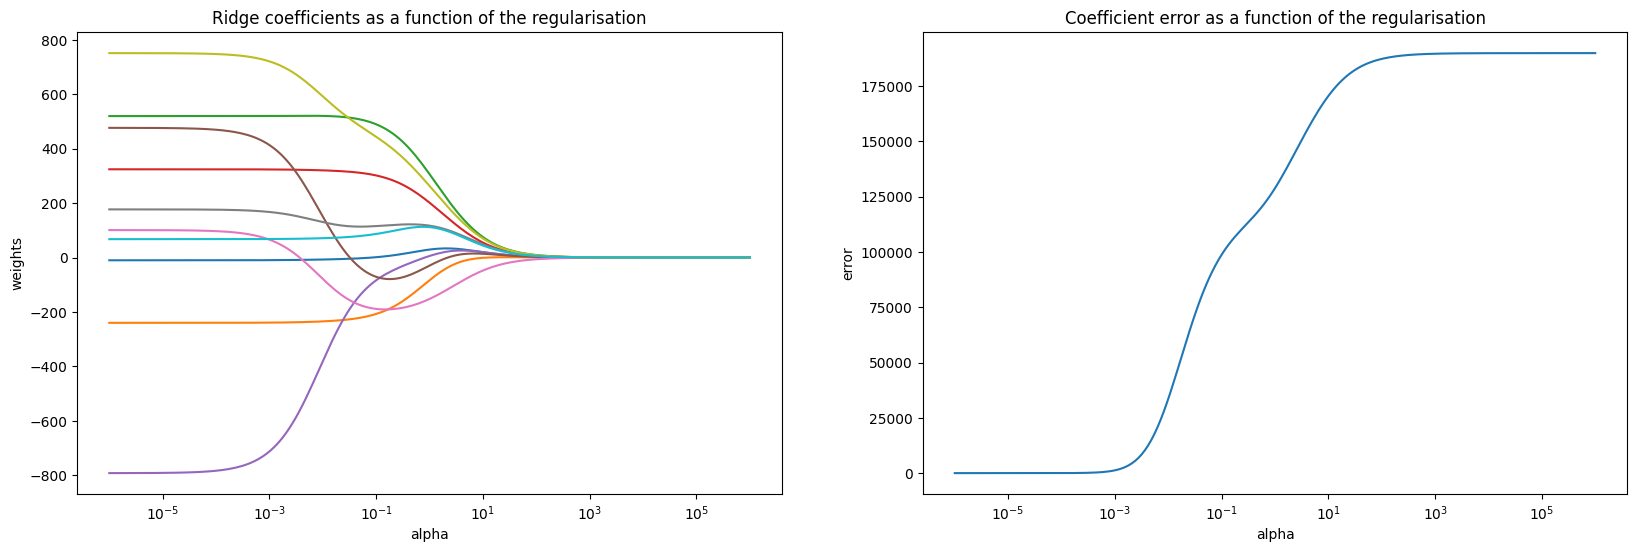

In [ ]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [ ]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.06669919663030115
Score: 0.5138352359035858


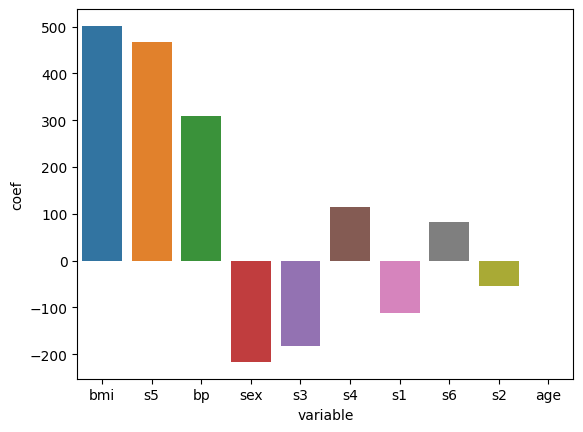

In [ ]:
view_coeff(X, optimal_ridge)

In [ ]:
optimal_ridge.coef_

array([  -1.26474186, -216.39460047,  501.54971795,  308.13254162,
       -112.18452928,  -54.47177855, -182.30247501,  114.03129811,
        466.75421801,   81.94402103])

#### 1.4 Lasso

##### 1.4.1 Calculate Lasso Regression model

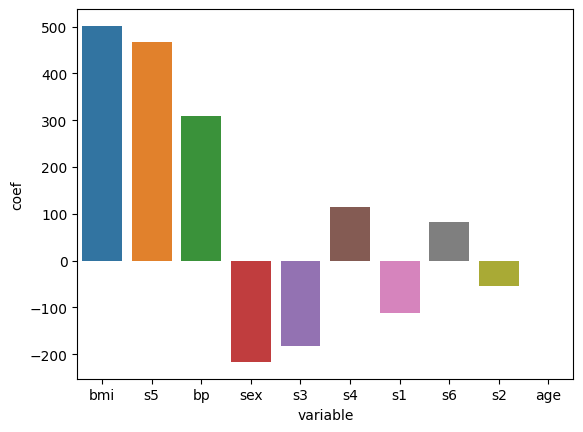

In [ ]:
## Calculate Lasso Regression model
view_coeff(X, optimal_ridge)

# create a model object to hold the modelling parameters

lassomodel = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate

lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    lassomodel.set_params(alpha = a)
    lassomodel.fit(X, y)
    coefs.append(lassomodel.coef_)
    errors.append(mean_squared_error(lassomodel.coef_, model.coef_))


# Don't make alpha too high, you won't let your coefficients train, and too low will not be useful. Give the model to do the job with a big range, and solve the most optimal alpha.


The range of alpha values determines how much a Lasso regression model penalises or shrinks the coefficients of different features. A range from very small to very large alpha values allows the model to find the right balance between selecting important features and reducing the impact of less important ones.

##### 1.4.2 Visual Representation of Coefficient of Lasso Model

Hint: Same as Ridge

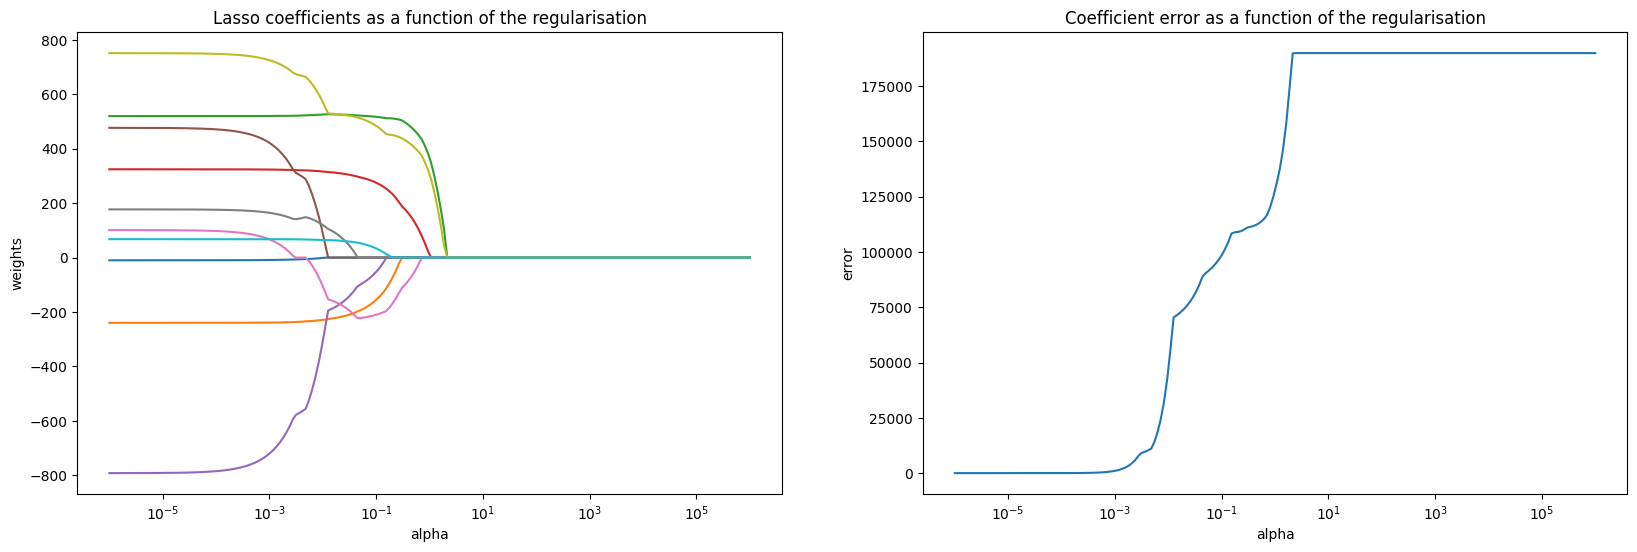

In [ ]:
# Display results

plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.4.3. [BONUS]  Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

Alpha: 0.05805225516094896
Score: 0.5126478025867265


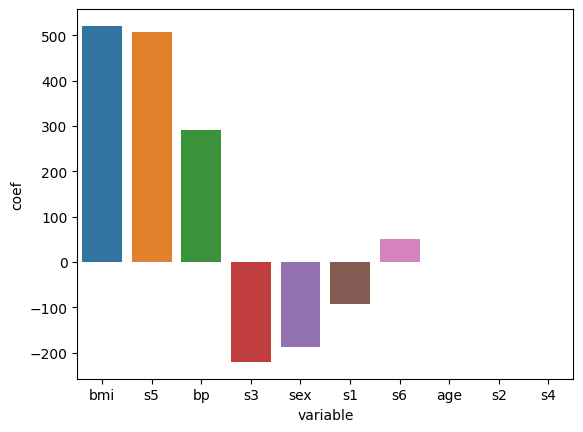

In [ ]:
# Find Optimal Lasso Using LassoCV

optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))


view_coeff(X, optimal_lasso)

In [ ]:
# Plot Coefficient

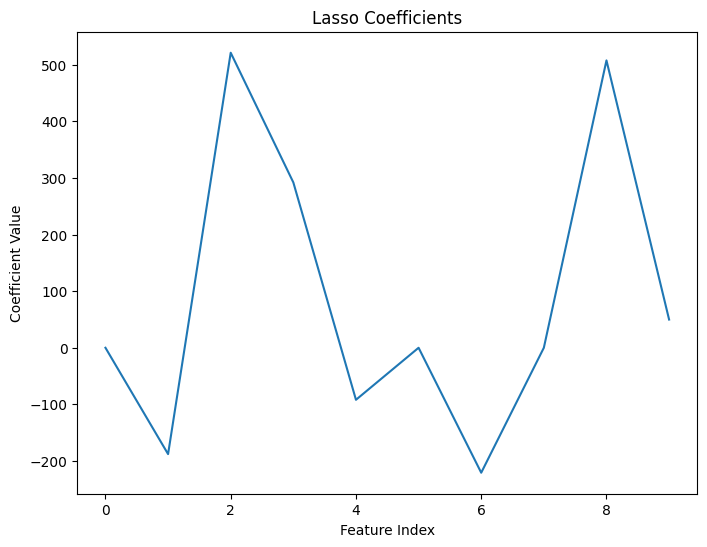

In [ ]:
# Get the coefficients from the optimal Lasso model
lasso_coefs = optimal_lasso.coef_

# Create a plot of the coefficients
plt.figure(figsize=(8, 6))
plt.plot(range(len(lasso_coefs)), lasso_coefs)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients')
plt.show()

### 2. [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create sctterplot for both Ridge and Lasso residuals.

In [ ]:
# Build the ridge and lasso using optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)
lasso = Lasso(alpha=optimal_lasso.alpha_)

# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge
ridge.fit(X, y)
lasso.fit(X, y)

Lasso(alpha=0.05805225516094896)

In [ ]:
# model residuals:

ridge_resid = y - ridge.predict(X)
lasso_resid = y - lasso.predict(X)

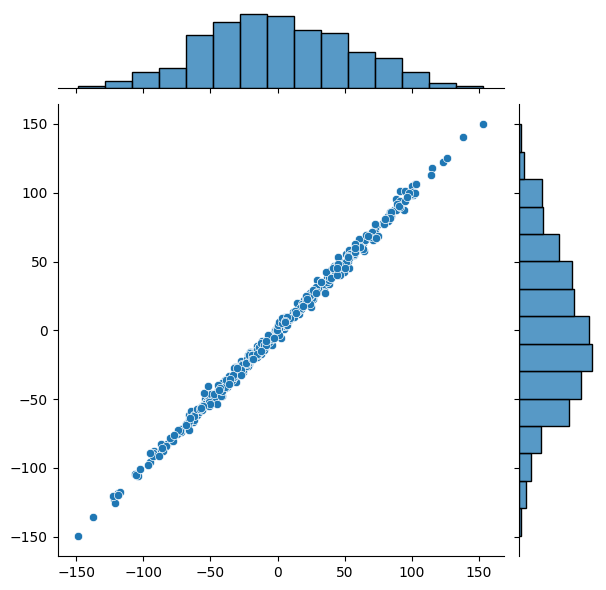

In [ ]:
# Jointplot

import seaborn as sns

sns.jointplot(x=ridge_resid, y=lasso_resid)




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



